<a href="https://colab.research.google.com/github/daemonkil/OurBus-Data-Scientist-Assignment/blob/main/OurBus_Data_Scientist_Assignment_2_Himanshu_Bansal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1:

Improve if there is any scope in this (here) visualization, the data is here.
You may use a subset of data.

1. The purpose of this task is to evaluate the thought process behind
creating and evaluating data visualization.

2. You may also submit a document praising the visualization and also
detailing its shortcomings.

# Solution:

Data visualizations can be very colorful and impressive. But we have to remember that the key to creating effective data visualizations doesn’t hinge on whether it’s exciting, but rather on whether it uncovers the real business issues that need to be addressed.

Here are few categories I have considered while improving the visualization:

1. **Big-picture considerations**: I started with the foundational items that shape the overall design. These include such things as how much data to include and how to make it easy to understand.

2. **Color**: People are affected by color, so choosing complementary ones are important. I made sure to use them consistently so that I don’t confuse the viewer.

3. **Design issues**: Design issues are key on the web. People have come to expect a certain level of sophistication, so I strived to make this data visualization look well thought-out.

4. **Text formatting**: Because you’re limiting the text you use, you need to make each word useful and understandable.

5. **Interactivity**: The key to good data visualizations is the ability to help users analyze different data sets. The graphs have been plotted thinking carefully about what I choose to use as what-if scenarios.

6. **Design for mobile**: When I create a data viz, I assume that some of the users will be mobile and I made sure the design is suitable for different devices.

In [ ]:
import os

os.system('jupyter nbconvert --to html OurBus_Data_Scientist_Assignment_2_Himanshu_Bansal.ipynb')

65280

In [ ]:
# Importing Libraries

import pandas as pd
import missingno as msno 
import numpy as np

In [ ]:
# Reading the csv file

path = "/content/MicrobeScope 2018 - public datasheet - DATA_full.csv"
data_full = pd.read_csv(path, header=None)
data_full.columns = data_full.iloc[1]
data_full = data_full.drop([0,1,2]).reset_index()
data_full = data_full.drop(["index"], axis=1)

In [ ]:
# Replace '-' with nan values

data_full_updated = data_full[data_full.columns].replace('-', np.nan)

# removing commas and characters
data_full_updated["Hits_news"] = data_full_updated["Hits_news"].str.replace(',','')
data_full_updated["Hits"] = data_full_updated["Hits"].str.replace(',','')
data_full_updated["CFR_adult"] = data_full_updated["CFR_adult"].str.replace('%','')
data_full_updated["I_notoriety"] = data_full_updated["I_notoriety"].str.replace(',','')

In [ ]:
data_full_updated.head()

1,ID,Name,Sublabel,Pathogen_type,R0,CFR_adult,Biosafety,Survive_surfaces,Survive_ideal,CFR_adult_grp,CFR_child,Hits,Hits_news,I_news,I_yucky,I_fear,I_ignored,I_attention,I_notoriety,Mode,Dose,Dose_grp,Dose_type,Incubation,Incubation_range,Incidence,Incidence_raw,Incidence_US,Incidence_Eur,Incidence_Af,Prevalence,Prevalence_raw,DALYs,DALYs_raw,DALYs_US,DALYs_Eur,DALYs_Af,Fatal,Fatal_raw,Fatal_US,Fatal_Eur,Fatal_Af,Peak,Peak_year,Vulnerable,Hotspots,Treatment,Effectiveness,Resistance
0,79,COVID-19,Novel Coronavirus,virus,2.0,2,3,NaN,NaN,Low,NaN,NaN,1100000000,NaN,NaN,NaN,NaN,NaN,NaN,air droplets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Anthrax,"(cutaneous, untreated)",bacterium,0.0,20.0,3,NaN,NaN,Moderate,14%,10700000,25600,0.24,NaN,NaN,0.0000,NaN,53500000,air droplets,10,10,human,4,1-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"Antibiotics: Penicillin, ciprofloxacin (and ot...",NaN,NaN
2,2,Anthrax,(gastrointestinal),bacterium,0.0,50.0,3,NaN,NaN,High,65%,10700000,25600,0.24,NaN,NaN,0.0000,NaN,21400000,air droplets,NaN,NaN,NaN,4,2-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,64,"1979 outbreak, Soviet Union",NaN,NaN,NaN,NaN,NaN
3,3,Anthrax,(inhalation),bacterium,0.0,80.0,3,NaN,NaN,Very high,60%,10700000,25600,0.24,NaN,NaN,0.0000,NaN,13375000,air droplets,"25,000","10,000",human,4,3-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,C. difficile,NaN,bacterium,NaN,6.3,2,150,NaN,Low,1.5%,1300000,2760,0.21,NaN,NaN,NaN,NaN,20634921,fecal-oral,100,100,human,NaN,varies,NaN,NaN,"453,000","124,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,300","3,700",NaN,"15,000","US only, 2011",Older adults in hospitals or long-term care fa...,NaN,NaN,NaN,NaN


In [ ]:
# finding sparse features

pd.DataFrame(dict(data_full_updated.isna().sum()), index=["missing_values"]).T.sort_values(["missing_values"])

,missing_values
ID,0
Name,0
Mode,0
Pathogen_type,0
Hits_news,0
I_news,1
Hits,1
Incubation_range,1
Biosafety,2
Incubation,2


In [ ]:
# removing sparse features

data_full_updated = data_full_updated[["ID", "Name","Mode", "Pathogen_type","Hits_news","I_news","Hits","Biosafety", "Incubation","CFR_adult_grp","CFR_adult","R0","I_ignored", "I_notoriety", "Incidence"]]

In [ ]:
# Dropping rows with NA values

data_full_updated = data_full_updated.dropna(axis=0).reset_index().drop(["index"], axis=1)

In [ ]:
# Now There is no NAN in the dataset present

data_full_updated.head()

1,ID,Name,Mode,Pathogen_type,Hits_news,I_news,Hits,Biosafety,Incubation,CFR_adult_grp,CFR_adult,R0,I_ignored,I_notoriety,Incidence
0,5,Campylobacter,food and water,bacterium,5770,0.17,3440000,2,3,Virtually zero,0.02,0.0,0.0000,19865128187,166
1,7,Chikungunya,bites,virus,39400,0.53,7480000,3,3,Very low,0.1,1.7,0.0419,7480000000,0.7
2,8,Cholera,food and water,bacterium,53500,0.25,21300000,2,3,Low,3.2,9.5,0.1776,659711383,3.1
3,10,Dengue fever,bites,virus,7000,0.15,4730000,2,6,Virtually zero,0.04,11.0,1.5714,12680965147,101
4,11,Dengue fever,bites,virus,7000,0.15,4730000,2,6,Moderate,20.0,11.0,1.5714,23650000,101


In [ ]:
# Converting Datatypes of categorical features

data_full_updated["Biosafety"] = data_full_updated["Biosafety"].replace('2-3','3').astype(int)
data_full_updated["Mode"] = data_full_updated["Mode"].astype(str)
data_full_updated["Pathogen_type"] = data_full_updated["Pathogen_type"].astype(str)
data_full_updated["CFR_adult_grp"] = data_full_updated["CFR_adult_grp"].astype(str)
data_full_updated["Hits_news"] = data_full_updated["Hits_news"].astype(int)
data_full_updated["I_news"] = data_full_updated["I_news"].astype(float)
data_full_updated["Hits"] = data_full_updated["Hits"].astype(int)
data_full_updated["Incubation"] = data_full_updated["Incubation"].astype(float)
data_full_updated["CFR_adult"] = data_full_updated["CFR_adult"].astype(float)
data_full_updated["R0"] = data_full_updated["R0"].astype(float)
data_full_updated["I_ignored"] = data_full_updated["I_ignored"].astype(float)
data_full_updated["I_notoriety"] = data_full_updated["I_notoriety"].astype(float)
data_full_updated["Incidence"] = data_full_updated["Incidence"].astype(float)
data_full_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             53 non-null     object 
 1   Name           53 non-null     object 
 2   Mode           53 non-null     object 
 3   Pathogen_type  53 non-null     object 
 4   Hits_news      53 non-null     int64  
 5   I_news         53 non-null     float64
 6   Hits           53 non-null     int64  
 7   Biosafety      53 non-null     int64  
 8   Incubation     53 non-null     float64
 9   CFR_adult_grp  53 non-null     object 
 10  CFR_adult      53 non-null     float64
 11  R0             53 non-null     float64
 12  I_ignored      53 non-null     float64
 13  I_notoriety    53 non-null     float64
 14  Incidence      53 non-null     float64
dtypes: float64(7), int64(3), object(5)
memory usage: 6.3+ KB


In [ ]:
# scaling features for plotting

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data_full_updated[["Hits_news","I_news","Hits", "Incubation","CFR_adult", "R0", "I_ignored", "I_notoriety", "Incidence"]])
data_full_updated[["Hits_news","I_news","Hits", "Incubation","CFR_adult", "R0", "I_ignored", "I_notoriety", "Incidence"]] = scaled = scaler.transform(data_full_updated[["Hits_news","I_news","Hits", "Incubation","CFR_adult", "R0", "I_ignored", "I_notoriety", "Incidence"]])
data_full_updated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             53 non-null     object 
 1   Name           53 non-null     object 
 2   Mode           53 non-null     object 
 3   Pathogen_type  53 non-null     object 
 4   Hits_news      53 non-null     float64
 5   I_news         53 non-null     float64
 6   Hits           53 non-null     float64
 7   Biosafety      53 non-null     int64  
 8   Incubation     53 non-null     float64
 9   CFR_adult_grp  53 non-null     object 
 10  CFR_adult      53 non-null     float64
 11  R0             53 non-null     float64
 12  I_ignored      53 non-null     float64
 13  I_notoriety    53 non-null     float64
 14  Incidence      53 non-null     float64
dtypes: float64(9), int64(1), object(5)
memory usage: 6.3+ KB


In [ ]:
# Box PLot of scaled features

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=scaled[0],name="Hits_news"))
fig.add_trace(go.Box(y=scaled[1],name="I_news"))
fig.add_trace(go.Box(y=scaled[2],name="Hits"))
fig.add_trace(go.Box(y=scaled[3],name="Incubation"))
fig.add_trace(go.Box(y=scaled[4],name="CFR_adult"))
fig.add_trace(go.Box(y=scaled[5],name="R0"))
fig.add_trace(go.Box(y=scaled[6],name="I_ignored"))
# fig.add_trace(go.Box(y=scaled[7],name="I_notoriety"))
# fig.add_trace(go.Box(y=scaled[8],name="Incidence"))
# fig.add_trace(go.Box(y=data_full_updated["Hits_news"],name="Hits_news"))
# fig.add_trace(go.Box(y=data_full_updated["I_news"],name="I_news"))
# fig.add_trace(go.Box(y=data_full_updated["Hits"],name="Hits"))
# fig.add_trace(go.Box(y=data_full_updated["Incubation"],name="Incubation"))
# fig.add_trace(go.Box(y=data_full_updated["CFR_adult"],name="CFR_adult"))
# fig.add_trace(go.Box(y=data_full_updated["R0"],name="R0"))
# fig.add_trace(go.Box(y=data_full_updated["I_ignored"],name="I_ignored"))
#fig.add_trace(go.Box(y=data_full_updated["I_notoriety"],name="I_notoriety"))
#fig.add_trace(go.Box(y=data_full_updated["Incidence"],name="Incidence"))

fig.update_layout(title_text="Box Plot of different columns explaining the outliers and variations")
fig.show()

In [ ]:
# Violin Plot of scaled features
fig = go.Figure()
fig.add_trace(go.Violin(y=scaled[0],name="Hits_news", box_visible=True,
                               meanline_visible=True, opacity=0.6,
                               x0='Hits_news'))

fig.add_trace(go.Violin(y=scaled[1],name="I_news", box_visible=True,
                               meanline_visible=True, opacity=0.6,
                               x0='I_news'))

fig.add_trace(go.Violin(y=scaled[2],name="Hits", box_visible=True,
                               meanline_visible=True, opacity=0.6,
                               x0='Hits'))

fig.add_trace(go.Violin(y=scaled[3],name="Incubation", box_visible=True,
                               meanline_visible=True, opacity=0.6,
                               x0='Incubation'))

fig.add_trace(go.Violin(y=scaled[4],name="CFR_adult", box_visible=True, 
                               meanline_visible=True, opacity=0.6,
                               x0='CFR_adult'))

fig.add_trace(go.Violin(y=scaled[5],name="R0", box_visible=True, 
                               meanline_visible=True,opacity=0.6,
                               x0='R0'))

fig.add_trace(go.Violin(y=scaled[6],name="I_ignored", box_visible=True, 
                               meanline_visible=True,opacity=0.6,
                               x0='I_ignored'))

# fig.add_trace(go.Violin(y=scaled[7],name="I_notoriety", box_visible=True, 
#                                meanline_visible=True,opacity=0.6,
#                                x0='I_notoriety'))

# fig.add_trace(go.Violin(y=scaled[8],name="I_ignored", box_visible=True, 
#                                meanline_visible=True,opacity=0.6,
#                                x0='Incidence'))

fig.update_layout(title_text="Voilin Plot of different columns explaining the outliers and distribution", 
                  yaxis_zeroline=False, height=600)
fig.show()

In [ ]:
# Encoding Cateorical to numerical values

# cleanup_nums_1 = {"Pathogen_type":{"virus": 1, "bacterium": 2,"parasite":3,"prion":4},
#                   "Mode":{"air droplets": 1, "bites": 2,"body fluids":3,"fecal-oral":4,"food and water":5,"other":6},
#                "CFR_adult_grp":{"Virtually zero":1,"Very low":2,"Low":3,"Moderate":4,"Virtually certain":5, "High":6,"Very high":7}
#                }

# data_full_updated = data_full_updated.replace(cleanup_nums_1)

In [ ]:
# Experimental for K means Clustering to find patterns in data

# one_hot = pd.get_dummies(df['Pathogen_type'])
# one_hot_mode = pd.get_dummies(df['Mode'])
# one_hot_cfr = pd.get_dummies(df['CFR_adult_grp'])

# # Drop column B as it is now encoded
# df = df.drop('Pathogen_type',axis = 1)
# df = df.drop('Mode',axis = 1)
# df = df.drop('CFR_adult_grp',axis = 1)

# # Join the encoded df
# df = df.join(one_hot)
# df = df.join(one_hot_mode)
# df = df.join(one_hot_cfr)

In [ ]:
data_full_updated.head()

1,ID,Name,Mode,Pathogen_type,Hits_news,I_news,Hits,Biosafety,Incubation,CFR_adult_grp,CFR_adult,R0,I_ignored,I_notoriety,Incidence
0,5,Campylobacter,5,2,-0.264446,-0.319729,-0.406732,2,-0.263460,1,-0.813378,-0.361419,-0.381555,-0.102700,1.181824
1,7,Chikungunya,2,1,-0.244426,-0.253426,-0.101714,3,-0.263460,2,-0.810878,-0.252181,-0.371734,-0.128975,-0.362672
2,8,Cholera,5,2,-0.236032,-0.304995,0.941691,2,-0.263460,3,-0.713990,0.249029,-0.339928,-0.143445,-0.340248
3,10,Dengue fever,2,1,-0.263714,-0.323413,-0.309338,2,-0.260003,1,-0.812753,0.345415,-0.013240,-0.117941,0.574490
4,11,Dengue fever,2,1,-0.263714,-0.323413,-0.309338,2,-0.260003,4,-0.188922,0.345415,-0.013240,-0.144794,0.574490


### Parallel Plots

In [ ]:
# parallel plot to visualize only categorical data of 10 diseases

import plotly.express as px
fig = px.parallel_categories(data_full_updated.iloc[0:10], color="Biosafety", dimensions=["Pathogen_type","Mode", "CFR_adult_grp"])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



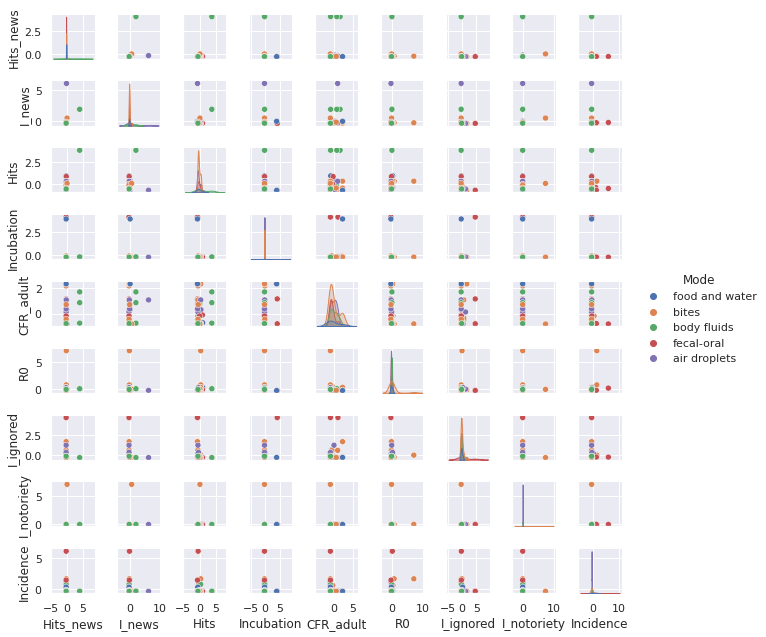

In [ ]:
import seaborn as sns
sns.set()
sns.pairplot(data_full_updated.[["Mode", "Hits_news","I_news","Hits", "Incubation","CFR_adult", "R0", "I_ignored", "I_notoriety", "Incidence"]], hue='Mode', size=1);
# 
# fig = px.parallel_coordinates(data_full_updated.iloc[1:10], color="Biosafety", dimensions=["Hits_news","I_news","Hits", "Incubation","CFR_adult", "R0", "I_ignored", "I_notoriety", "Incidence"])
# fig.show()

In [ ]:
fig = px.parallel_coordinates(data_full_updated[0:10], color="R0", dimensions=["Hits_news","I_news","Hits", "Incubation","CFR_adult", "I_ignored", "I_notoriety", "Incidence"])
fig.show()

### # Missing Value Analysis

<AxesSubplot:>

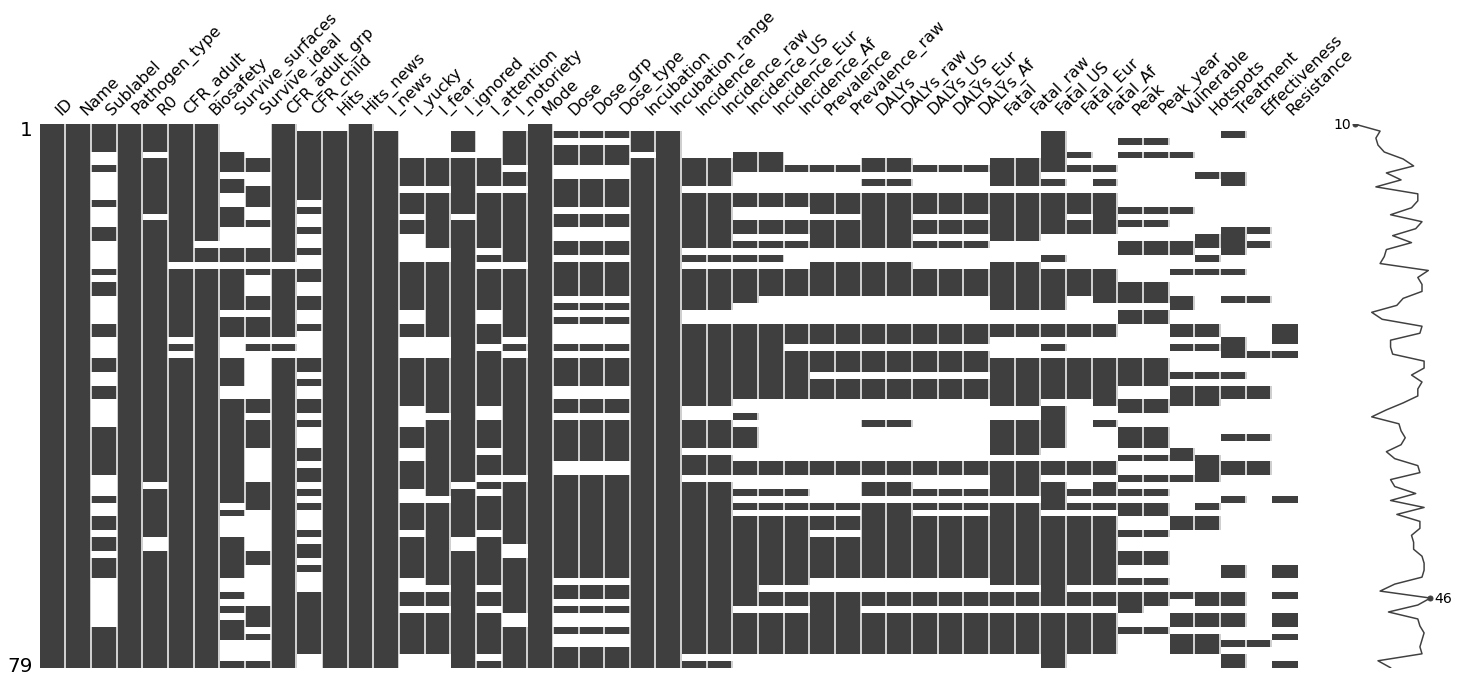

In [ ]:
# Missing Value Analysis
'''Missing Values Analysis gives us the information is there any correlation between missing values or Missing Values
missing at random(MAR) or missing completely at random (MCAR), not missing at random (NMAR)'''
msno.matrix(data_full_updated) 

<AxesSubplot:xlabel='1', ylabel='1'>

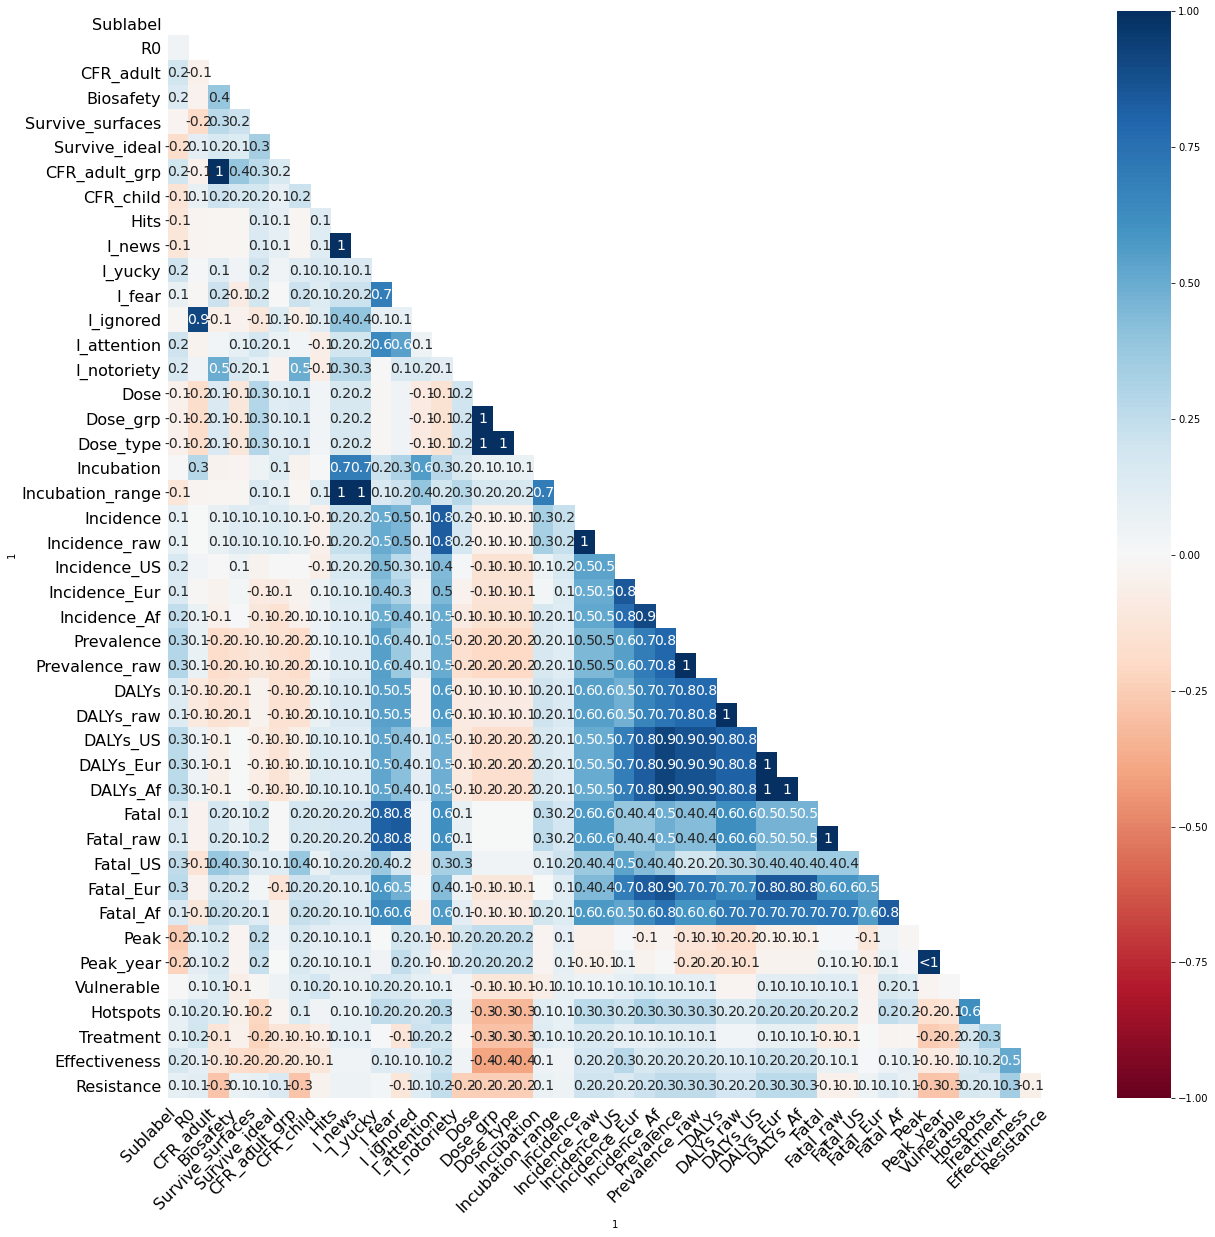

In [ ]:
# Correlation on Missing Values
msno.heatmap(data_full_updated,figsize=(20, 20)) 

From the above two graph we can analyze that there are some correlation between missing values in the columns.

Out of 81 data samples, 41 samples in  DISEASE.2  are missing is 50% data is missing so we can remove this column and from Graph-1, we conclude that all the columns (except disease 2) have missing values in the same index. so we can remove missing values.

In [ ]:
data_full_updated = data_full.drop([1])

In [ ]:
data_full_updated = data_full_updated.reset_index()

In [ ]:
# data_full_updated = data_full_updated.replace("-", "Nan")

# Question-2
Complete data cleaning task:  https://academic.csuohio.edu/holcombj/clean/cleaningassignment.htm

* Complete only task 1&2 in the link.


In [ ]:
data = pd.read_csv("/content/scraped.csv")

#### For fetching all the records from these links, I used an Automated Scraping tool.

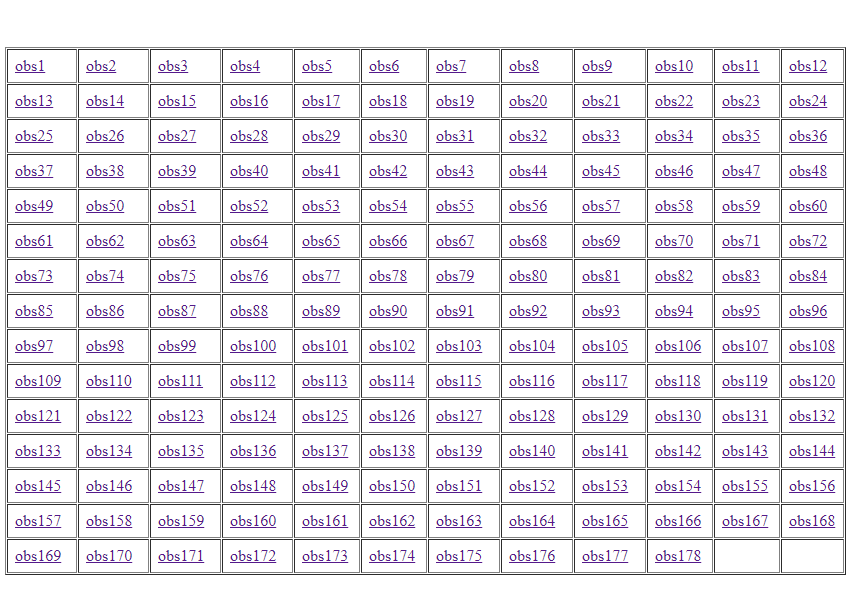

#### Following is the content on a single link from above:

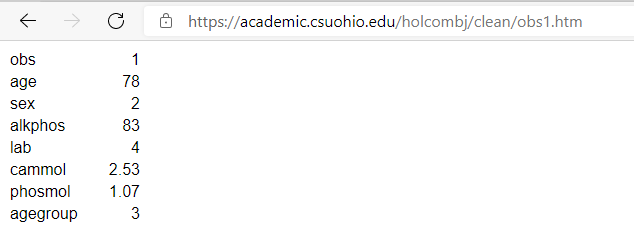

In [ ]:
# missing values
data.isna().sum()

OBSNO       0
AGE         1
SEX         0
ALKPHOS     0
LAB         1
CAMMOL      1
PHOSMMOL    1
AGEGROUP    0
dtype: int64

In [ ]:
# scaling features for plotting

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[["AGE", "ALKPHOS", "CAMMOL", "PHOSMMOL"]])
data[["AGE", "ALKPHOS", "CAMMOL", "PHOSMMOL"]] = scaled = scaler.transform(data[["AGE", "ALKPHOS", "CAMMOL", "PHOSMMOL"]])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBSNO     178 non-null    int64  
 1   AGE       177 non-null    float64
 2   SEX       178 non-null    int64  
 3   ALKPHOS   178 non-null    float64
 4   LAB       177 non-null    float64
 5   CAMMOL    177 non-null    float64
 6   PHOSMMOL  177 non-null    float64
 7   AGEGROUP  178 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 11.2 KB


In [ ]:
# Boxplot and violin plot for checking the outliers and distribution

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=scaled[0],name="AGE"))
fig.add_trace(go.Box(y=scaled[1],name="ALKPHOS"))
fig.add_trace(go.Box(y=scaled[2],name="CAMMOL"))
fig.add_trace(go.Box(y=scaled[3],name="PHOSMMOL"))

fig.update_layout(title_text="Box Plot for outliers detection")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Violin(y=scaled[0],name="AGE", box_visible=True,
                               meanline_visible=True, opacity=0.6,
                               x0='AGE'))

# fig.add_trace(go.Violin(y=data["SEX"],name="SEX", box_visible=True,
#                                meanline_visible=True, opacity=0.6,
#                                x0='SEX'))

fig.add_trace(go.Violin(y=scaled[1],name="ALKPHOS", box_visible=True,
                               meanline_visible=True, opacity=0.6,
                               x0='ALKPHOS'))

#fig.add_trace(go.Violin(y=data["LAB"],name="LAB", box_visible=True,
                              #  meanline_visible=True, opacity=0.6,
                              #  x0='LAB'))

fig.add_trace(go.Violin(y=scaled[2],name="CAMMOL", box_visible=True, 
                               meanline_visible=True, opacity=0.6,
                               x0='CAMMOL'))

fig.add_trace(go.Violin(y=scaled[3],name="PHOSMMOL", box_visible=True, 
                               meanline_visible=True, opacity=0.6,
                               x0='PHOSMMOL'))

#fig.add_trace(go.Violin(y=data["AGEGROUP"],name="AGEGROUP", box_visible=True, 
                              #  meanline_visible=True,opacity=0.6,
                              #  x0='AGEGROUP'))


fig.update_layout(title_text="Voilin Plot for distribution and outliers", 
                  yaxis_zeroline=False, height=600)
fig.show()

In [ ]:
# relationship between categorical variables
fig = px.parallel_categories(data, dimensions=["AGEGROUP", "SEX", "LAB"])
fig.show()

In [ ]:
# relation between numerical features and SEX

fig = px.parallel_coordinates(data.iloc[0:10], color="SEX", dimensions=["PHOSMMOL","AGE", "CAMMOL" , "ALKPHOS","SEX"],color_continuous_scale=px.colors.diverging.Tealrose,)
fig.show()

In [ ]:
data.isna().sum()

OBSNO       0
AGE         1
SEX         0
ALKPHOS     0
LAB         1
CAMMOL      1
PHOSMMOL    1
AGEGROUP    0
dtype: int64

#### Question 2)  b) 

In [ ]:
# converting categorical columns

data["AGEGROUP"] = pd.Categorical(data["AGEGROUP"])
data["SEX"] = pd.Categorical(data["SEX"])
data["LAB"] = pd.Categorical(data["LAB"])

In [ ]:
## Summary of SEX, LAB and AGEGROUP

data[["AGEGROUP", "SEX", "LAB"]].describe()

,AGEGROUP,SEX,LAB
count,178,178,177.0
unique,5,2,6.0
top,2,1,1.0
freq,70,91,88.0


#####  mean, median, standard deviation, min and max broken down by sex

In [ ]:
# mean, median, standard deviation, min and max broken down by sex
data_male = data[data["SEX"]==1]

In [ ]:
data_male[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,91.000000,91.000000,91.000000
mean,85.813187,2.318132,1.059341
std,22.985460,0.121727,0.182512
min,42.000000,1.900000,0.520000
25%,71.000000,2.250000,0.920000
50%,83.000000,2.330000,1.070000
75%,97.000000,2.400000,1.190000
max,168.000000,2.580000,1.420000


In [ ]:
data_female = data[data["SEX"]==2]

In [ ]:
data_female[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,87.000000,86.000000,86.000000
mean,99.218391,2.393837,1.148605
std,35.744385,0.140287,0.159972
min,43.000000,2.000000,0.810000
25%,72.000000,2.300000,1.040000
50%,91.000000,2.400000,1.145000
75%,116.500000,2.495000,1.252500
max,219.000000,2.750000,1.610000


##### summarize the variables alkphos, cammol and phosmmol in a similar way with the factor variable as lab. 

In [ ]:
data["LAB"].unique()

[4.0, 5.0, 2.0, 3.0, 1.0, 6.0, NaN]
Categories (6, float64): [4.0, 5.0, 2.0, 3.0, 1.0, 6.0]

In [ ]:
data_lab_1 = data[data["LAB"]==1]
data_lab_2 = data[data["LAB"]==2]
data_lab_3 = data[data["LAB"]==3]
data_lab_4 = data[data["LAB"]==4]
data_lab_5 = data[data["LAB"]==5]
data_lab_6 = data[data["LAB"]==6]

###### Summarize data break down with respect to LAB

In [ ]:
# Details for LAB 1

data_lab_1[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,88.000000,87.000000,88.000000
mean,94.795455,2.315402,1.105341
std,31.342806,0.132444,0.174039
min,50.000000,1.900000,0.770000
25%,72.750000,2.250000,0.970000
50%,85.500000,2.300000,1.130000
75%,111.750000,2.400000,1.230000
max,219.000000,2.700000,1.610000


In [ ]:
# Details for LAB 2

data_lab_2[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,42.000000,42.000000,41.000000
mean,88.928571,2.422381,1.129268
std,24.102821,0.100506,0.157550
min,54.000000,2.230000,0.870000
25%,75.000000,2.350000,1.000000
50%,85.500000,2.400000,1.130000
75%,97.000000,2.472500,1.230000
max,168.000000,2.750000,1.420000


In [ ]:
# Details for LAB 3

data_lab_3[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,16.00000,16.000000,16.000000
mean,83.37500,2.351875,1.036250
std,30.93838,0.147839,0.158277
min,42.00000,2.000000,0.840000
25%,60.75000,2.245000,0.930000
50%,72.50000,2.375000,1.020000
75%,110.50000,2.462500,1.115000
max,138.00000,2.530000,1.420000


In [ ]:
# Details for LAB 4

data_lab_4[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,14.000000,14.000000,14.000000
mean,118.428571,2.445000,1.034286
std,36.575978,0.137155,0.194609
min,83.000000,2.130000,0.650000
25%,90.000000,2.407500,0.872500
50%,111.000000,2.465000,1.085000
75%,130.000000,2.522500,1.152500
max,213.000000,2.650000,1.320000


In [ ]:
# Details for LAB 5

data_lab_5[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,11.000000,11.000000,11.000000
mean,70.636364,2.301818,1.084545
std,18.784423,0.158608,0.261586
min,45.000000,2.150000,0.520000
25%,57.500000,2.190000,0.985000
50%,67.000000,2.250000,1.130000
75%,83.000000,2.340000,1.195000
max,111.000000,2.630000,1.490000


In [ ]:
# Details for LAB 6

data_lab_6[["ALKPHOS",	"CAMMOL", "PHOSMMOL"]].describe()

,ALKPHOS,CAMMOL,PHOSMMOL
count,6.000000,6.000000,6.000000
mean,84.333333,2.360000,1.210000
std,26.257697,0.087407,0.089889
min,57.000000,2.230000,1.100000
25%,64.000000,2.312500,1.167500
50%,78.500000,2.375000,1.190000
75%,102.750000,2.400000,1.242500
max,122.000000,2.480000,1.360000
